## 1.加载数据集

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(train_labels.shape)

(60000,)


In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
print(test_images.shape)

(10000, 28, 28)


In [6]:
print(test_labels.shape)

(10000,)


In [7]:
print(test_labels)

[7 2 1 ... 4 5 6]


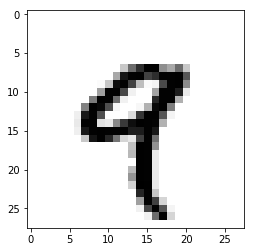

9


In [11]:
# 显示训练集第四张图片及对应的标签
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[4])

# 2.构建网络

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28, )))
network.add(layers.Dense(10, activation="softmax"))

# 3.编译网络

In [15]:
network.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# 4.数据预处理

In [16]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

# 5.准备标签

In [17]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 6.训练以及评估

In [19]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("\n", test_loss, test_acc)

Epoch 1/5
60000/60000 [==============================] - 0s - loss: 0.0293 - acc: 0.9912     
Epoch 2/5
60000/60000 [==============================] - 0s - loss: 0.0215 - acc: 0.9937     
Epoch 3/5
60000/60000 [==============================] - 0s - loss: 0.0168 - acc: 0.9951     
Epoch 4/5
60000/60000 [==============================] - 0s - loss: 0.0129 - acc: 0.9963     
Epoch 5/5
 8512/10000 [========================>.....] - ETA: 0s
 0.07385599004029718 0.9811
